<a href="https://colab.research.google.com/github/puranjay123/100_Days_of_MachineLearning/blob/main/Internship_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic (418 persons survived or not)

## Importing the libraries

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [52]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [53]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [54]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [55]:
train["Sex"] = pd.Categorical(train["Sex"])
train["Embarked"] = pd.Categorical(train["Embarked"])


In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(2), float64(2), int64(5), object(3)
memory usage: 71.7+ KB


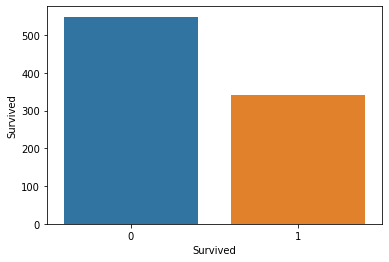

<Figure size 252x252 with 0 Axes>

In [57]:
import seaborn as sns
sns.barplot(x=train["Survived"],y=train["Survived"].value_counts())
plt.figure(figsize=(3.5,3.5));

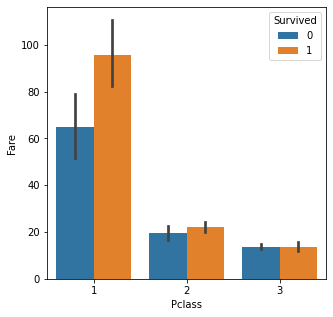

In [58]:
plt.figure(figsize=(5,5))
sns.barplot(x="Pclass",y="Fare",hue="Survived",data=train);

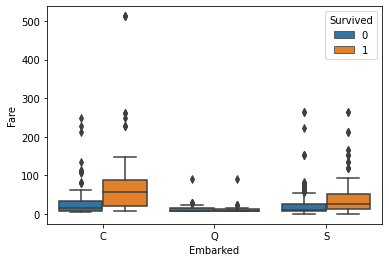

In [59]:
sns.boxplot(x="Embarked",y="Fare",hue="Survived",data=train);

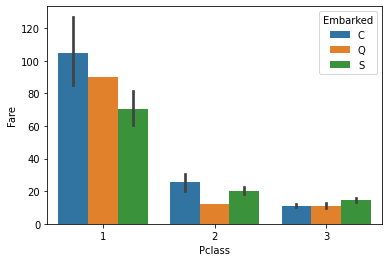

In [60]:
sns.barplot(x="Pclass",y="Fare",hue="Embarked",data=train);

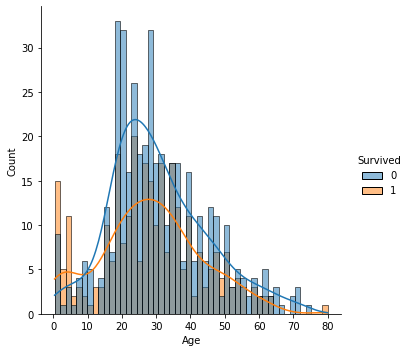

In [61]:
sns.displot(x=train['Age'],hue=train['Survived'],kde="True",bins=50)
plt.show()

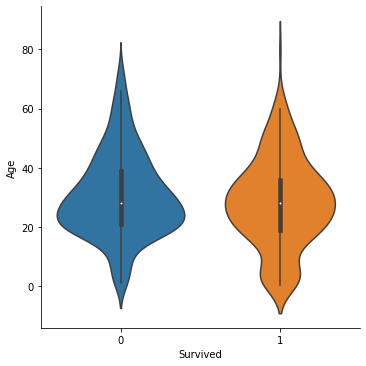

In [62]:
sns.catplot(x="Survived",y="Age",kind="violin",data=train);

In [63]:
train.groupby(["Pclass","Sex"])[["Survived"]].mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

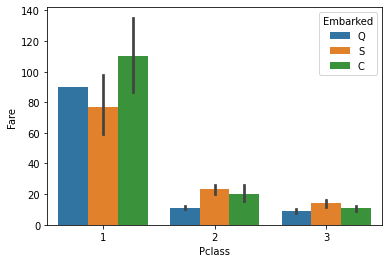

In [64]:
sns.barplot(x="Pclass",y="Fare",hue="Embarked",data=test);

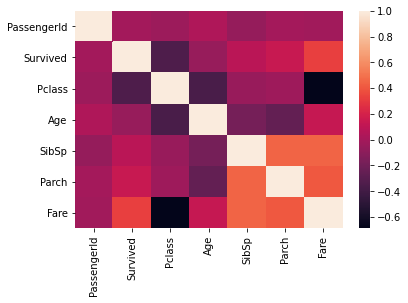

In [65]:
sns.heatmap(train.corr(method="spearman"));

In [66]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Taking care of missing data

In [67]:
train.drop(["Name","Cabin"],axis=1,inplace=True)

In [68]:
average= train.groupby(["Sex"])[["Age"]].mean()
average=round(average)
average

,Age
Sex,
female,28.0
male,31.0


In [69]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [70]:
train.corr(method="spearman")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.034091,0.041010,-0.061161,0.001235,-0.013975
Survived,-0.005007,1.000000,-0.339668,-0.052565,0.088879,0.138266,0.323736
Pclass,-0.034091,-0.339668,1.000000,-0.361666,-0.043019,-0.022801,-0.688032
Age,0.041010,-0.052565,-0.361666,1.000000,-0.182061,-0.254212,0.135051
SibSp,-0.061161,0.088879,-0.043019,-0.182061,1.000000,0.450014,0.447113
Parch,0.001235,0.138266,-0.022801,-0.254212,0.450014,1.000000,0.410074
Fare,-0.013975,0.323736,-0.688032,0.135051,0.447113,0.410074,1.000000


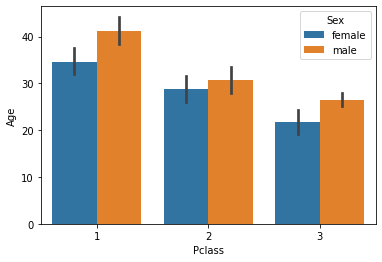

In [71]:
sns.barplot(x="Pclass",y="Age",hue="Sex",data=train);

In [72]:
train["Age"].mean()

29.69911764705882

In [73]:
errors= average-train["Age"].mean()
errors

,Age
Sex,
female,-1.699118
male,1.300882


In [74]:
(100/average)*errors

,Age
Sex,
female,-6.068277
male,4.196395


In [75]:
indexes_by_age= train[train["Age"].isnull()==True].index

In [76]:
train["Age"].fillna(train.groupby(["Sex"])["Age"].transform("mean"),inplace=True)

In [77]:
train.iloc[indexes_by_age]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,male,30.726645,0,0,330877,8.4583,Q
17,18,1,2,male,30.726645,0,0,244373,13.0000,S
19,20,1,3,female,27.915709,0,0,2649,7.2250,C
26,27,0,3,male,30.726645,0,0,2631,7.2250,C
28,29,1,3,female,27.915709,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,male,30.726645,0,0,2629,7.2292,C
863,864,0,3,female,27.915709,8,2,CA. 2343,69.5500,S
868,869,0,3,male,30.726645,0,0,345777,9.5000,S
878,879,0,3,male,30.726645,0,0,349217,7.8958,S


In [78]:
train["Age"]= round(train["Age"])

In [79]:
train.iloc[indexes_by_age]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,male,31.0,0,0,330877,8.4583,Q
17,18,1,2,male,31.0,0,0,244373,13.0000,S
19,20,1,3,female,28.0,0,0,2649,7.2250,C
26,27,0,3,male,31.0,0,0,2631,7.2250,C
28,29,1,3,female,28.0,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,male,31.0,0,0,2629,7.2292,C
863,864,0,3,female,28.0,8,2,CA. 2343,69.5500,S
868,869,0,3,male,31.0,0,0,345777,9.5000,S
878,879,0,3,male,31.0,0,0,349217,7.8958,S


In [80]:
train[train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,female,38.0,0,0,113572,80.0,NaN
829,830,1,1,female,62.0,0,0,113572,80.0,NaN


In [81]:
train.groupby(["Embarked","Pclass","SibSp"])[["Fare"]].mean()

Fare
Embarked Pclass SibSp            
C        1      0      104.368635
                1       94.144646
                2      262.375000
                3             NaN
                4             NaN
...                           ...
S        3      2       18.613422
                3       24.378483
                4       32.635714
                5       46.900000
                8       69.550000

[63 rows x 1 columns]

In [82]:
train["Embarked"].fillna("C",inplace=True)

In [83]:
train.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Test Dataa


In [84]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [85]:
test.drop(["Name","Cabin"],axis=1,inplace=True)

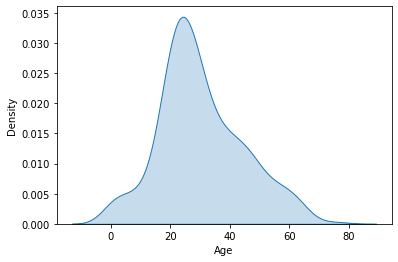

In [86]:
sns.kdeplot(test["Age"],shade=True);


In [87]:
test.describe().T


,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [88]:
test["Age"].mean()


30.272590361445783

In [89]:
average_test= test.groupby(["Sex"])[["Age"]].mean()
average_test= round(average_test)
average_test

,Age
Sex,
female,30.0
male,30.0


In [90]:
errors_test= average_test - test["Age"].mean()
errors_test

,Age
Sex,
female,-0.27259
male,-0.27259


In [91]:
(100/average_test)*errors_test

,Age
Sex,
female,-0.908635
male,-0.908635


In [92]:
indexes_by_age_test= test[test["Age"].isnull()==True].index

In [93]:
test["Age"].fillna(test.groupby(["Sex"])["Age"].transform("mean"),inplace=True)


In [94]:
test.iloc[indexes_by_age_test]


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
10,902,3,male,30.272732,0,0,349220,7.8958,S
22,914,1,female,30.272362,0,0,PC 17598,31.6833,S
29,921,3,male,30.272732,2,0,2662,21.6792,C
33,925,3,female,30.272362,1,2,W./C. 6607,23.4500,S
36,928,3,female,30.272362,0,0,342712,8.0500,S
...,...,...,...,...,...,...,...,...,...
408,1300,3,female,30.272362,0,0,334915,7.7208,Q
410,1302,3,female,30.272362,0,0,365237,7.7500,Q
413,1305,3,male,30.272732,0,0,A.5. 3236,8.0500,S
416,1308,3,male,30.272732,0,0,359309,8.0500,S


In [95]:
test["Age"]= round(test["Age"])
test.iloc[indexes_by_age_test]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
10,902,3,male,30.0,0,0,349220,7.8958,S
22,914,1,female,30.0,0,0,PC 17598,31.6833,S
29,921,3,male,30.0,2,0,2662,21.6792,C
33,925,3,female,30.0,1,2,W./C. 6607,23.4500,S
36,928,3,female,30.0,0,0,342712,8.0500,S
...,...,...,...,...,...,...,...,...,...
408,1300,3,female,30.0,0,0,334915,7.7208,Q
410,1302,3,female,30.0,0,0,365237,7.7500,Q
413,1305,3,male,30.0,0,0,A.5. 3236,8.0500,S
416,1308,3,male,30.0,0,0,359309,8.0500,S


In [96]:
test[test["Fare"].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,male,60.0,0,0,3701,NaN,S


In [97]:
test["Fare"].fillna(test.groupby(["Embarked","Pclass"])["Fare"].transform("mean"),inplace=True)

In [98]:
test.isnull().sum()


PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [99]:
nonsurvived=train.drop("Survived",axis=1)
survived= train["Survived"]
train= pd.concat([nonsurvived,survived],axis=1)
train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,female,35.0,1,0,113803,53.1000,S,1
4,5,3,male,35.0,0,0,373450,8.0500,S,0


In [100]:
train.drop(["Ticket","PassengerId"],axis=1,inplace=True)
test.drop(["Ticket"],axis=1,inplace=True)

In [101]:
train=pd.get_dummies(train,drop_first=True)
train.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,1


In [102]:
test=pd.get_dummies(test,drop_first=True)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.0,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [103]:
X= train.drop("Survived",axis=1)
y=train[["Survived"]]
y.value_counts()

Survived
0           549
1           342
dtype: int64

In [105]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.7,random_state=50)

In [106]:
y_train.value_counts()


Survived
0           387
1           236
dtype: int64

AttributeError: ignored